In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, mean_squared_error, f1_score, r2_score

In [37]:
df = pd.read_csv('Titanic_Dataset.csv')

In [38]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [39]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [41]:
df['Age'].mean()

np.float64(30.272590361445783)

In [42]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

/tmp/ipython-input-42-2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [43]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [44]:
df['Fare'].mean()

np.float64(35.627188489208635)

In [45]:
df['Fare'].fillna(df['Fare'].mean(), inplace= True)

/tmp/ipython-input-45-2790014942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(), inplace= True)


In [46]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [49]:
df['Cabin'].value_counts()

,count
Cabin,
B57 B59 B63 B66,3
B45,2
C23 C25 C27,2
C78,2
C31,2
...,...
B41,1
C7,1
D40,1


In [60]:
alphabet = [chr(i) for i in range(65, 91)]
lis = [alphabet[i%26] for i in range(327)]
print(len(lis))
null_indices_for_Cabin = df[df['Cabin'].isnull()].index

327


In [61]:
c=0
for i in null_indices_for_Cabin:
  df.loc[i, 'Cabin'] = lis[c]
  c+=1


In [62]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [65]:
def converter(x):
  if x.dtype == 'object':
    x = LabelEncoder().fit_transform(x)
  return x

In [66]:
df = df.apply(lambda x : converter(x))

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


In [72]:
x = df.drop('Survived', axis = 1)
y = df['Survived'].values

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [75]:
log_model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_model.fit(xtrain, ytrain)
ypredict = log_model.predict(xtest)

<Axes: >

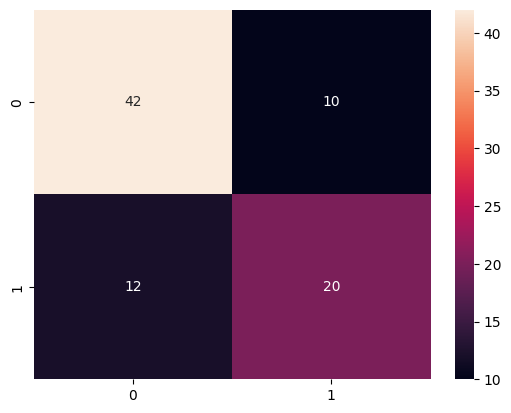

In [76]:
sns.heatmap(confusion_matrix(ytest, ypredict), annot =True)